## Scipy& Matplotlib

#### We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below.
#### Task:
####         1.fitting it to the periodic function
####         2.plot the fit
####         Data:
####         Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
####         Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18 

In [13]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

In [8]:
Min = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]
Max = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]

In [9]:
def yearly_temp(times, avg , ampl , time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

months = np.arange(12)
res_max, cov_max = optimize.curve_fit(yearly_temp, months,
                                      np.array(Max), [20, 10, 0])

res_min, cov_min = optimize.curve_fit(yearly_temp, months,
                                      np.array(Min), [-40, 20, 0])

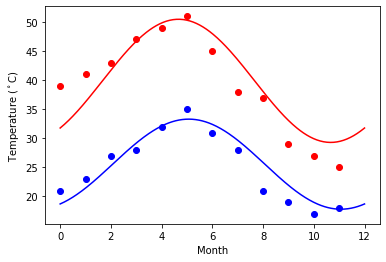

In [16]:
days = np.linspace(0,12,num=365)
plt.figure()
plt.plot(months,Max,'ro')
plt.plot(days,yearly_temp(days, *res_max), 'r-')
plt.plot(months, Min, 'bo')
plt.plot(days, yearly_temp(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')
plt.show()

#### Charts to plot: 1. Create a pie chart presenting the male/female proportion   2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender 

In [19]:
import pandas as pd

In [20]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)

In [21]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


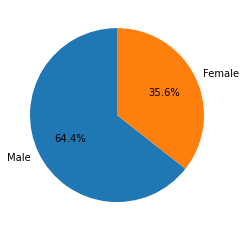

In [33]:
males = titanic[titanic['sex']=='male'].index.value_counts().count()
females =titanic[titanic['sex']=='female'].index.value_counts().count()
plt.pie(list_1,labels=['Male','Female'],startangle=90,autopct='%.1f%%')
plt.show()

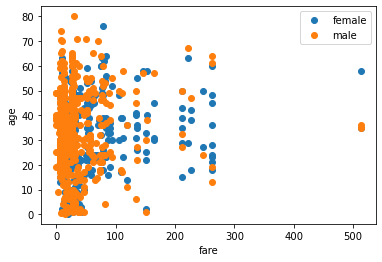

In [46]:
groups = titanic.groupby("sex")
for name, group in groups:
    plt.plot(group["fare"], group["age"], marker="o", linestyle="", label=name)
plt.xlabel('fare')
plt.ylabel('age')
plt.legend()